In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error as mae

from scipy import stats
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW



Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.


In [2]:
n = 160
sigma = 0.4
mean = 9.57
mean_exp = 9.5

In [6]:
def z_test(n, sigma, mean, mean_exp):
    std = sigma / np.sqrt(n)
    statistic =  (mean - mean_exp) / std
    p_value = 2 * (1. - stats.norm.cdf(abs(statistic)))
    
    return p_value

In [7]:
round(z_test(n, sigma, mean, mean_exp), 4)

0.0269

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

    линейную регрессию с помощью LinearRegression без параметров
    случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05\alpha=0.05α=0.05?

In [9]:
df = pd.read_csv("diamonds.txt", sep='\t')
df.head(3)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31


In [10]:
X = df[["carat", "depth", "table", "x", "y", "z"]].values
y = df.price.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

preds_lin_reg = lin_reg.predict(X_test)

In [25]:
preds_lin_reg_sub = preds_lin_reg - y_test
pd.DataFrame(preds_lin_reg_sub).describe()

,0
count,13485.000000
mean,19.229235
std,1463.058136
min,-12455.940789
25%,-342.670547
50%,63.649682
75%,652.518106
max,18239.846360


In [18]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

/home/max/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
preds_rf_sub = preds_rf - y_test
pd.DataFrame(preds_rf_sub).describe()

,0
count,13485.000000
mean,47.970728
std,1404.570512
min,-12443.600000
25%,-247.525000
50%,33.400000
75%,402.400000
max,8878.700000


In [23]:
from matplotlib import pylab as plt

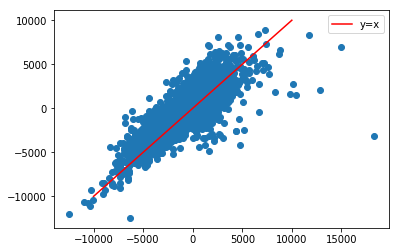

In [31]:
plt.scatter(preds_lin_reg_sub, preds_rf_sub)

x = np.linspace(-10000, 10000,100)
y = x
plt.plot(x, y, '-r', label='y=x')
plt.legend()

In [32]:
stats.ttest_rel(np.abs(preds_lin_reg_sub), np.abs(preds_rf_sub))

Ttest_relResult(statistic=13.017729783880077, pvalue=1.6551745751089384e-38)

In [34]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(np.abs(preds_lin_reg_sub) - np.abs(preds_rf_sub)).tconfint_mean())

95% confidence interval: [74.287245, 100.624521]
